In [2]:
import numpy as np

In [3]:
# 连续形与连续形的计算相关性
X = np.array([65,72,78,65])
Y = np.array([72,69,79,69])
np.corrcoef([X,Y,X,Y])

array([[1.        , 0.73239727, 1.        , 0.73239727],
       [0.73239727, 1.        , 0.73239727, 1.        ],
       [1.        , 0.73239727, 1.        , 0.73239727],
       [0.73239727, 1.        , 0.73239727, 1.        ]])

In [20]:
#类别形与类别形的计算卡方检验,这里的例子有点不恰当，因为X的各个分量是连续形的，也可以这么做
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest #选取评价比较好的前多少个
from sklearn.feature_selection import chi2 #卡方检验
iris = load_iris()
X,y = iris.data,iris.target
print(X.shape,y.shape)
chiVallues = chi2(X,y)
print(X.shape)
print(chiVallues)
#得到新的x
X_new = SelectKBest(score_func=chi2,k=2).fit_transform(X,y)
print(X_new.shape)

(150, 4) (150,)
(150, 4)
(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]), array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))
(150, 2)


In [43]:
#查看数据的信息
import pandas as pd
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
Data_pd = pd.DataFrame(X,columns=["a","b","c","d"])
Data_pd[["target"]] = y.reshape(150,1)
Data_pd

,a,b,c,d,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


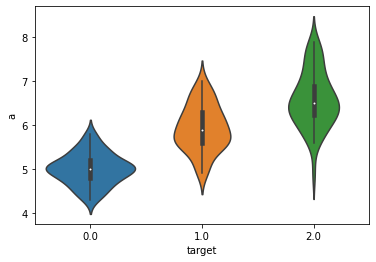

In [58]:
#类别与连续形绘制小提琴图
#取第一列和y绘制，x轴是类别，y轴是数据
import seaborn as sns
ax = sns.violinplot(x="target",y = "a",data=Data_pd)


### 正式开始

In [2]:
##赛题数据探索
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [3]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

In [4]:
train_data = pd.read_csv(train_data_file,sep='\t',encoding='utf-8')
test_data  = pd.read_csv(test_data_file, sep='\t',encoding='utf-8')

In [8]:
#查看数据结构
print(train_data.info())
print(train_data.describe())
print(train_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

# 可视化数据分布


##  箱型图

<AxesSubplot:ylabel='V0'>

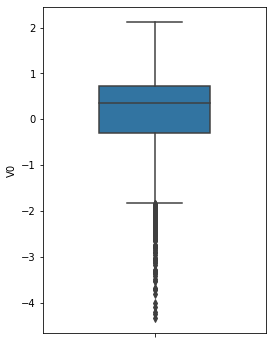

In [27]:
#有很多偏离值
fig = plt.figure(figsize=(4,6))
sns.boxplot(y = "V0",data=train_data,orient="v",width=0.5)

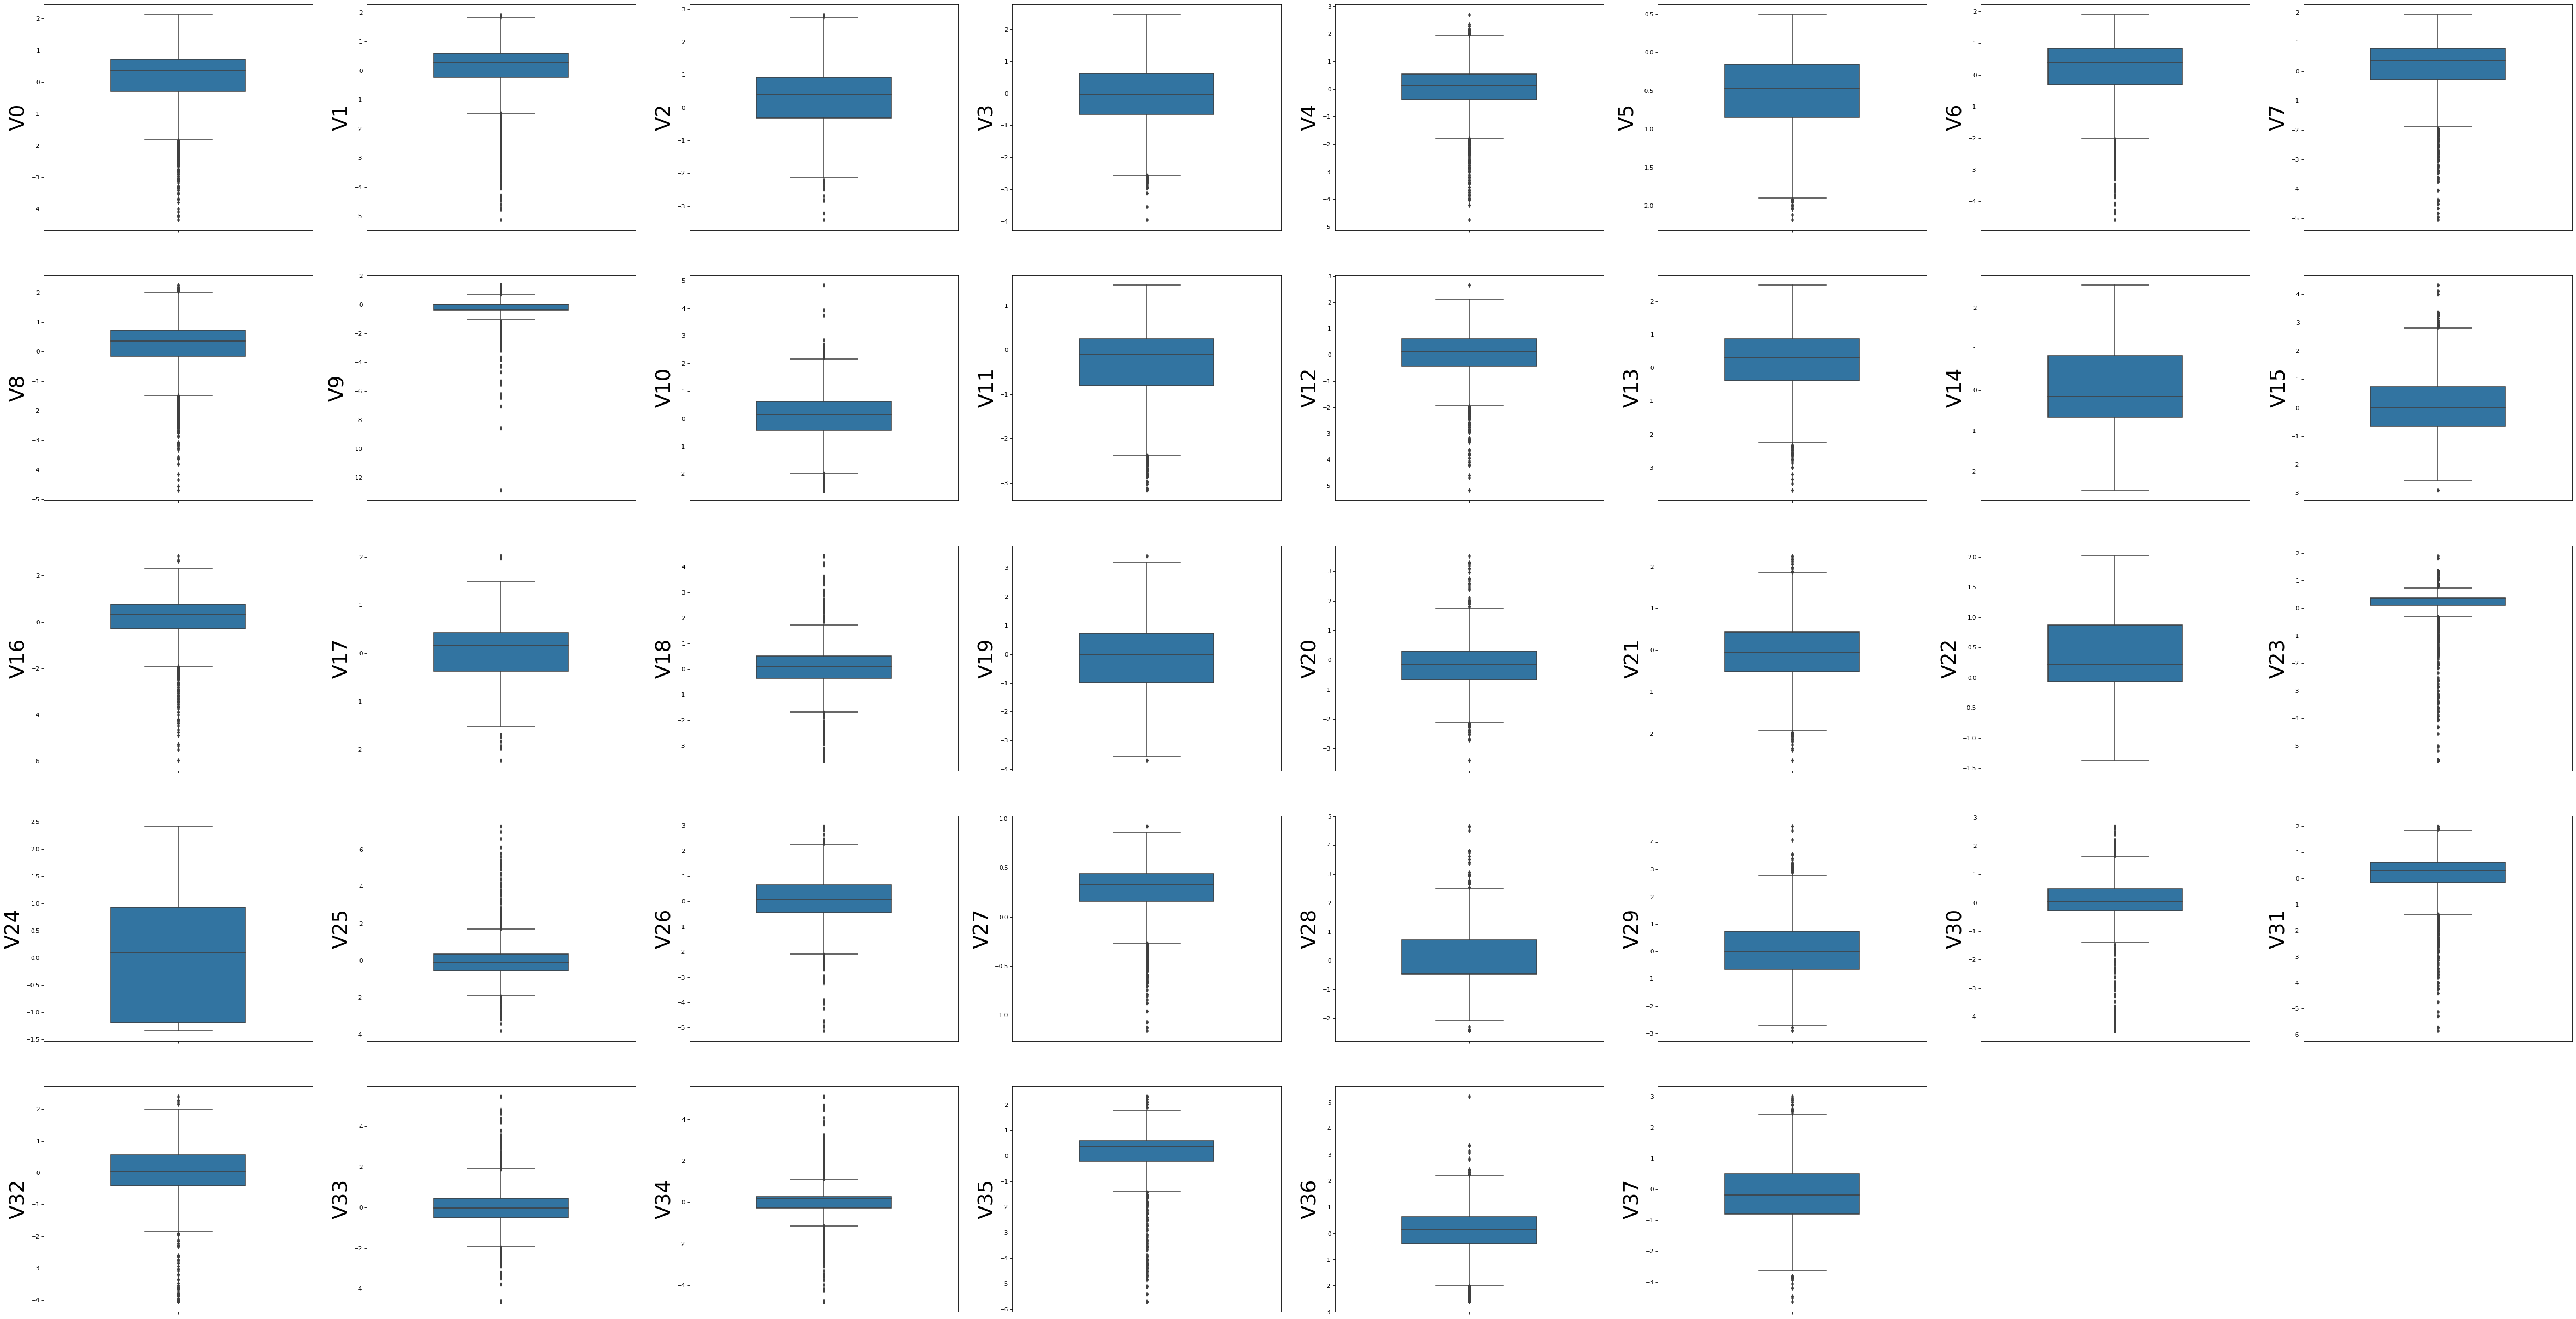

In [28]:
columns = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(80,60),dpi=75)
for i in range(38):
    plt.subplot(7,8,i+1)
    sns.boxplot(y = columns[i],data=train_data,orient='v',width=0.5)
    plt.ylabel(columns[i],fontsize=36)
plt.show()